### Principal Component Analysis (PCA) using Prince
This example is taken from the [Prince website](https://github.com/MaxHalford/Prince).

In [14]:
import pandas as pd
from sklearn.datasets import load_iris
from prince import PCA
import matplotlib.pyplot as plt

In [2]:
X, y = load_iris(return_X_y=True)
X = pd.DataFrame(data=X, columns=['Sepal length', 'Sepal width', 'Petal length', 'Petal width'])
y = pd.Series(y).map({0: 'Setosa', 1: 'Versicolor', 2: 'Virginica'})

In [6]:
pca = PCA(
    n_components=2,
    n_iter=3,
    rescale_with_mean=True,
    rescale_with_std=True,
    copy=True,
    engine='auto',
    random_state=42
)
pca = pca.fit(X)

In [7]:
# Extract the row principal coordinates:
# Each column stands for a principal component whilst each row
# stands a row in the original dataset. 
pca.transform(X).head()

,0,1
0,-2.264703,0.480027
1,-2.080961,-0.674134
2,-2.364229,-0.341908
3,-2.299384,-0.597395
4,-2.389842,0.646835


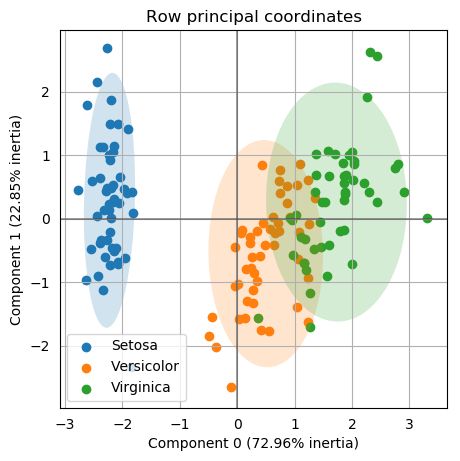

In [25]:
# Display these projections with the plot_row_coordinates method:
ax = pca.plot_row_coordinates(
    X,
    ax=None,
    x_component=0,
    y_component=1,
    labels=None,
    color_labels=y,
    ellipse_outline=False,
    ellipse_fill=True,
    show_points=True
)
fig = ax.get_figure()
fig.set_figheight(5)
fig.set_figwidth(5)
fig.set_dpi(100)
plt.show()

In [26]:
# Each principal component explains part of the underlying of the
# distribution. You can see by how much by accessing the
# explained_inertia_ property:
pca.explained_inertia_
# The explained inertia represents the percentage of the inertia
# each principal component contributes. It sums up to 1 if the
# n_components property is equal to the number of columns in the
# original dataset.

[0.7296244541329989, 0.22850761786701754]

In [10]:
# The explained inertia is obtained by dividing the eigenvalues
# obtained with the SVD by the total inertia, both of which are
# also accessible.
pca.eigenvalues_

[437.77467247979945, 137.10457072021055]

In [11]:
pca.total_inertia_

600.0000000000001

In [12]:
# You can also obtain the correlations between the original
# variables and the principal components.
pca.column_correlations(X)

,0,1
Petal length,0.991555,0.023415
Petal width,0.964979,0.064000
Sepal length,0.890169,0.360830
Sepal width,-0.460143,0.882716


In [13]:
# You may also want to know how much each observation contributes
# to each principal component. This can be done with the
# row_contributions method.
pca.row_contributions(X).head()

,0,1
0,0.011716,0.001681
1,0.009892,0.003315
2,0.012768,0.000853
3,0.012077,0.002603
4,0.013046,0.003052
